In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')



In [3]:
# Load and prepare diabetes dataset for Bayesian Linear Regression
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

# Standardize features
scaler = StandardScaler()
X_diabetes_scaled = scaler.fit_transform(X_diabetes)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_diabetes_scaled, y_diabetes, test_size=0.2, random_state=42)



In [4]:
#  Implement Bayesian Linear Regression
class BayesianLinearRegression:
    def __init__(self, alpha=1.0, beta=1.0):
        self.alpha = alpha  # Prior precision
        self.beta = beta    # Likelihood precision

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Calculate posterior parameters
        self.S_N_inv = np.eye(n_features) * self.alpha + self.beta * X.T @ X
        self.S_N = np.linalg.inv(self.S_N_inv)
        self.m_N = self.beta * self.S_N @ X.T @ y

        self.w = np.random.multivariate_normal(self.m_N, self.S_N)
        return self

    def predict(self, X):
        return X @ self.w



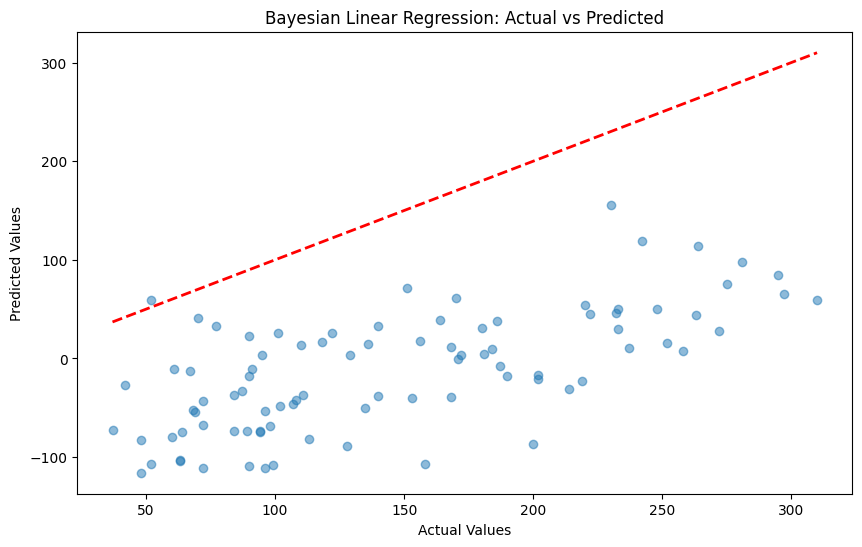

In [5]:
# Train and evaluate Bayesian Linear Regression
blr = BayesianLinearRegression(alpha=0.1, beta=1.0)
blr.fit(X_train, y_train)

# Generate predictions
y_pred = blr.predict(X_test)

# Calculate R2 score
r2 = 1 - np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Bayesian Linear Regression: Actual vs Predicted')
plt.show()



In [6]:
# Load and prepare wine quality dataset for Gaussian Mixture Model
from sklearn.datasets import load_wine
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Standardize features
X_wine_scaled = StandardScaler().fit_transform(X_wine)


In [7]:
# Implement Gaussian Mixture Model
n_components = 3
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_wine_scaled)

# Get cluster assignments
clusters = gmm.predict(X_wine_scaled)


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7fafd8923f40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so: cannot open shared object file: No such file or directory


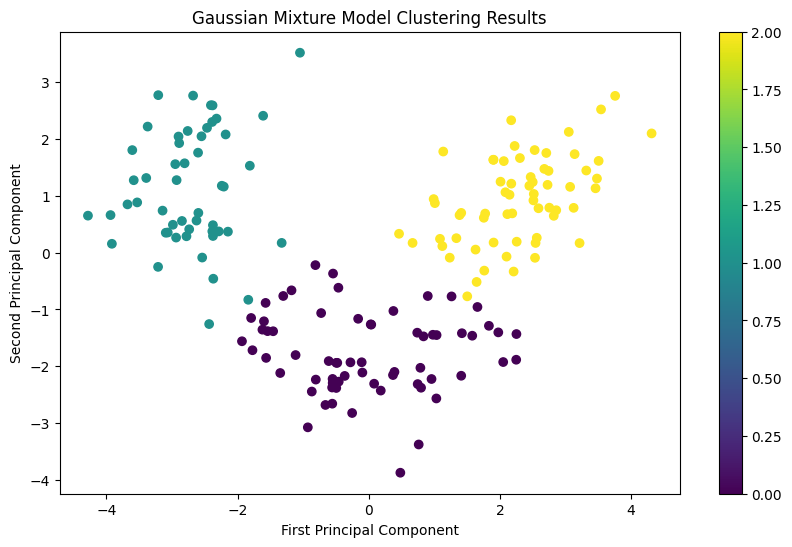

In [8]:
# Visualize GMM results using PCA
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_wine_pca = pca.fit_transform(X_wine_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Gaussian Mixture Model Clustering Results')
plt.show()



In [9]:
# Print model evaluation metrics
print("\nBayesian Linear Regression Results:")
print(f"R² Score: {r2:.3f}")

print("\nGaussian Mixture Model Results:")
print(f"Number of components: {n_components}")
print(f"Lower bound on the log-likelihood: {gmm.lower_bound_:.2f}")
print(f"Number of iterations to converge: {gmm.n_iter_}")




Bayesian Linear Regression Results:
R² Score: -4.277

Gaussian Mixture Model Results:
Number of components: 3
Lower bound on the log-likelihood: -11.84
Number of iterations to converge: 2


In [11]:
#  Visualize component distributions
# Select first two features for visualization
feature_idx = [0, 1]
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T





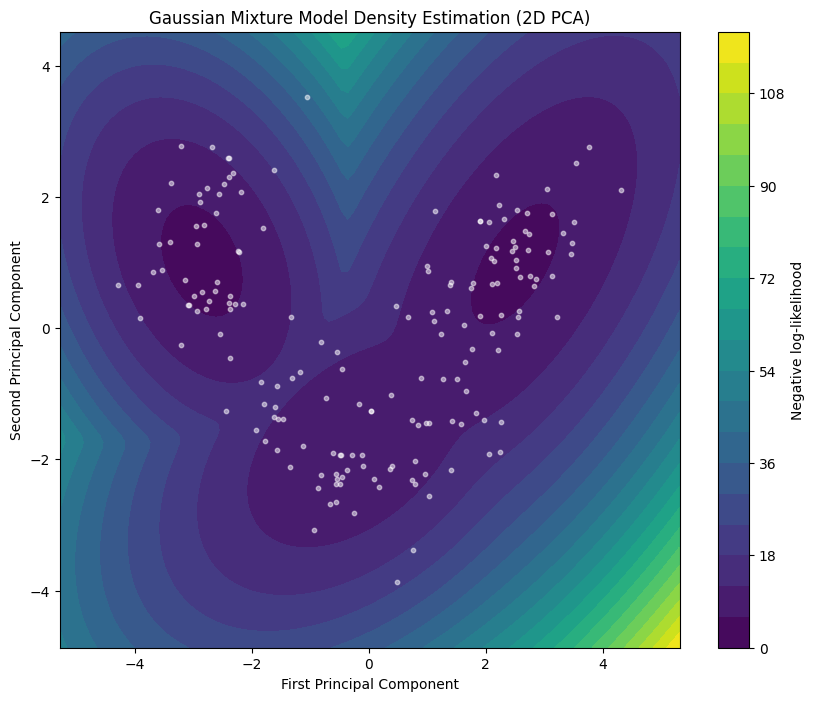

In [14]:
#  Visualize component distributions
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_wine_pca = pca.fit_transform(X_wine_scaled)

# Generate a grid of points spanning the range of the first two principal components
num_points = 100  # Number of points along each dimension
x_min, x_max = X_wine_pca[:, 0].min() - 1, X_wine_pca[:, 0].max() + 1
y_min, y_max = X_wine_pca[:, 1].min() - 1, X_wine_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, num_points),
                     np.linspace(y_min, y_max, num_points))

# Predict probabilities on the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = -gmm.score_samples(pca.inverse_transform(grid_points))  # Inverse transform to original space for prediction
Z = Z.reshape(xx.shape)  # Reshape to match the grid

# Plot the density contours
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, levels=20, cmap='viridis')
plt.colorbar(label='Negative log-likelihood')
plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], c='white', alpha=0.5, s=10)  # Plot original data points
plt.title('Gaussian Mixture Model Density Estimation (2D PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()